In [1]:
# loading required libraries
import pandas as pd
import numpy as np

In [2]:
# loading data
churn_train = pd.read_csv('udel-churn-train.csv')
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5634 non-null   int64  
 1   customerID        5634 non-null   object 
 2   gender            5589 non-null   object 
 3   SeniorCitizen     5573 non-null   float64
 4   Partner           5594 non-null   object 
 5   Dependents        5594 non-null   object 
 6   tenure            5544 non-null   float64
 7   PhoneService      5550 non-null   object 
 8   MultipleLines     5580 non-null   object 
 9   InternetService   5486 non-null   object 
 10  OnlineSecurity    5564 non-null   object 
 11  OnlineBackup      5528 non-null   object 
 12  DeviceProtection  5564 non-null   object 
 13  TechSupport       5564 non-null   object 
 14  StreamingTV       5529 non-null   object 
 15  StreamingMovies   5578 non-null   object 
 16  Contract          5555 non-null   object 


In [3]:
# create a deepy copy
df_train = churn_train.copy()
df_train['TotalCharges']=pd.to_numeric(df_train['TotalCharges'], errors='coerce')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5634 non-null   int64  
 1   customerID        5634 non-null   object 
 2   gender            5589 non-null   object 
 3   SeniorCitizen     5573 non-null   float64
 4   Partner           5594 non-null   object 
 5   Dependents        5594 non-null   object 
 6   tenure            5544 non-null   float64
 7   PhoneService      5550 non-null   object 
 8   MultipleLines     5580 non-null   object 
 9   InternetService   5486 non-null   object 
 10  OnlineSecurity    5564 non-null   object 
 11  OnlineBackup      5528 non-null   object 
 12  DeviceProtection  5564 non-null   object 
 13  TechSupport       5564 non-null   object 
 14  StreamingTV       5529 non-null   object 
 15  StreamingMovies   5578 non-null   object 
 16  Contract          5555 non-null   object 


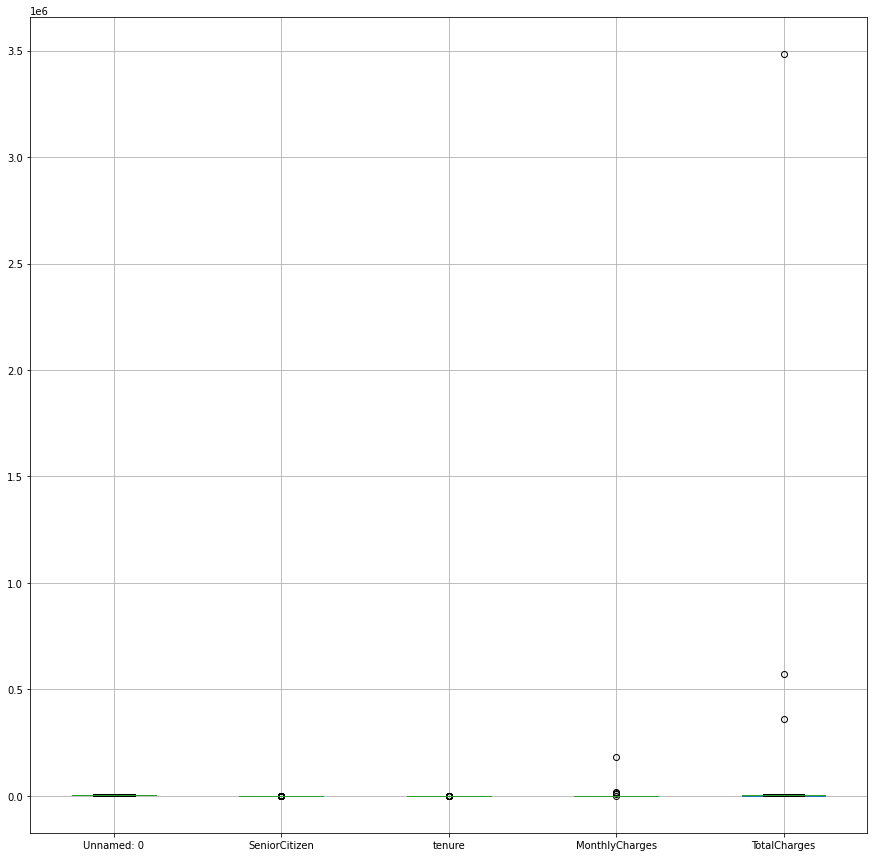

In [4]:
df_train.boxplot(figsize=(15,15))

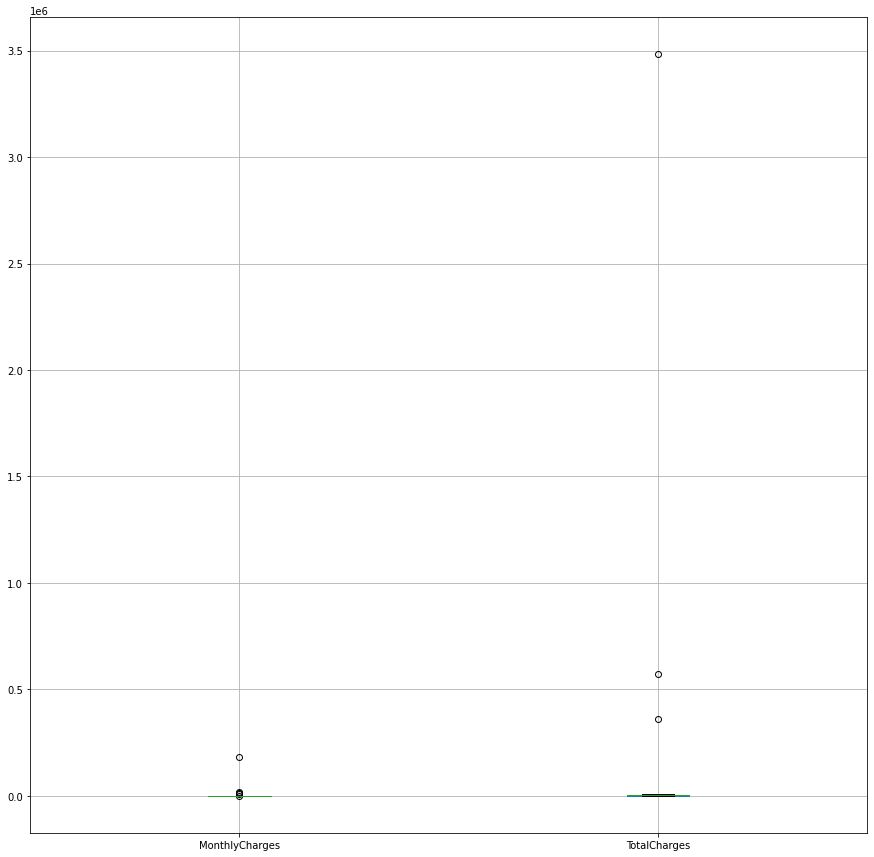

In [5]:
# create a boxploy of featuers which I think may have outliers
df3 = df_train[['MonthlyCharges','TotalCharges']]
df3.boxplot(figsize=(15,15))

In [6]:
df_train.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5573.000000,5544.000000,5546.000000,5.558000e+03
mean,3543.239617,0.162031,33.151335,104.170691,3.096741e+03
std,2028.125199,0.368513,31.085097,2437.072503,4.759352e+04
min,0.000000,0.000000,0.000000,18.250000,1.880000e+01
25%,1794.250000,0.000000,9.000000,35.750000,4.039125e+02
50%,3554.500000,0.000000,29.000000,70.550000,1.411275e+03
75%,5297.750000,0.000000,56.000000,90.100000,3.855425e+03
max,7042.000000,1.000000,720.000000,180087.950000,3.482010e+06


In [7]:
# replace the outliers
condition = df_train[df_train['TotalCharges'] > 500000].index
df_train.drop(condition , inplace=True)

In [8]:
df_train.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5632.000000,5571.000000,5542.000000,5544.000000,5556.000000
mean,3542.947976,0.162089,33.142909,104.178887,2367.978582
std,2028.301137,0.368566,31.087423,2437.512080,5309.630922
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,1793.750000,0.000000,9.000000,35.750000,403.300000
50%,3554.500000,0.000000,29.000000,70.550000,1410.725000
75%,5297.250000,0.000000,56.000000,90.100000,3849.462500
max,7042.000000,1.000000,720.000000,180087.950000,359777.500000


In [9]:
# prepare the data
X = df_train.drop(['Churn'],axis=1)
y = df_train['Churn']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5632 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5632 non-null   int64  
 1   customerID        5632 non-null   object 
 2   gender            5587 non-null   object 
 3   SeniorCitizen     5571 non-null   float64
 4   Partner           5592 non-null   object 
 5   Dependents        5592 non-null   object 
 6   tenure            5542 non-null   float64
 7   PhoneService      5548 non-null   object 
 8   MultipleLines     5578 non-null   object 
 9   InternetService   5484 non-null   object 
 10  OnlineSecurity    5562 non-null   object 
 11  OnlineBackup      5526 non-null   object 
 12  DeviceProtection  5562 non-null   object 
 13  TechSupport       5562 non-null   object 
 14  StreamingTV       5527 non-null   object 
 15  StreamingMovies   5576 non-null   object 
 16  Contract          5553 non-null   object 


In [10]:
# split the data into training set and a test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(4505, 21)
(1127, 21)


In [11]:
y.value_counts(normalize=True)

No     0.734553
Yes    0.265447
Name: Churn, dtype: float64

In [12]:
num_features = ['tenure','MonthlyCharges','TotalCharges']
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService'
               ,'MultipleLines','InternetService','OnlineSecurity','OnlineBackup'
               ,'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                'Contract','PaperlessBilling','PaymentMethod']

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# step 1 filling the missing data
# step 2 standardization - making features look like standard normally distributed 
num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),
        ('scaler', StandardScaler()),
        ]
)

# Create the preprocessing pipelines for the categorical features
# There are two steps in this pipeline:
# Step 1: filling the missing values if any using the most frequent value
# Step 2: one hot encoding

cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder()),
    ]
)

In [14]:
# Assign features to the pipelines
# Combine two pipelines to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

In [15]:
# Specify the model to use
# Make a full pipeline by combining preprocessor and the model
from sklearn.tree import DecisionTreeClassifier

tree_final_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('tree_clf', DecisionTreeClassifier()),
    ]
)

In [16]:
# model tuning and selection
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'preprocessor__num_pipeline__num_imputer__strategy': ['mean', 'median'],
        'tree_clf__criterion': ['gini', 'entropy'], 
        'tree_clf__max_depth': [3, 5, 7, 9, 11],
    }
]

# set up the grid search 
grid_search = GridSearchCV(tree_final_pipeline, param_grid, cv=5,
                          scoring='accuracy',
                          return_train_score=True)

In [17]:
# train the model using the full pipeline
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('num_imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                       

In [18]:
# check the best performing parameter combination
grid_search.best_params_

{'preprocessor__num_pipeline__num_imputer__strategy': 'median',
 'tree_clf__criterion': 'entropy',
 'tree_clf__max_depth': 5}

In [19]:
tree_clf_best = grid_search.best_estimator_
tree_clf_best

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('num_imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                

In [20]:
# making prediction
# the full pipeline steps will be applied to the testing set followed by the prediction
y_pred = tree_clf_best.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}')

Accuracy Score : 0.7843833185448092


In [22]:
churn_test = pd.read_csv('udel-churn-test.csv')

y_pred_churn = tree_clf_best.predict(churn_test)

# combine id and prediction for kaggle submission
tree_full_pipeline_submit = pd.DataFrame({
    'customerID': churn_test['customerID'],
    'Churn': y_pred_churn
})

# generate the csv
tree_full_pipeline_submit.to_csv('tree-full-pipeline-submit.csv', index=False)
print('csv saved! please submit the prediction csv to Kaggle.com')

csv saved! please submit the prediction csv to Kaggle.com
